# **Why linear regression models?**


### **1.   Leads to interpretable models >>   Policy making**

We can interpret the relationship between the input and the output for samll changes in the input and for the interactions between the inputs and so ona nd so forth.

Interpretable models are the essense of `policy making`. It is essential when you want to make a decision.

For eg: You are a steel manufacturer looking to maximize the throughput of your factory. you have several variables to look at like 'grade of steel', 'work-shifts', 'capacity/number of machines running', etc. Here, you want to have an interpretable model like

- If you change from morning shift to night shift what can you expect to be the change in the throughput.

- If you increase particular grade of steel what would be the throughput.


### **2.   Generalizes well to unseen data**

Linear regression usually performs consistently well on the data that we use to train the model and on any data that the model may not have seen.

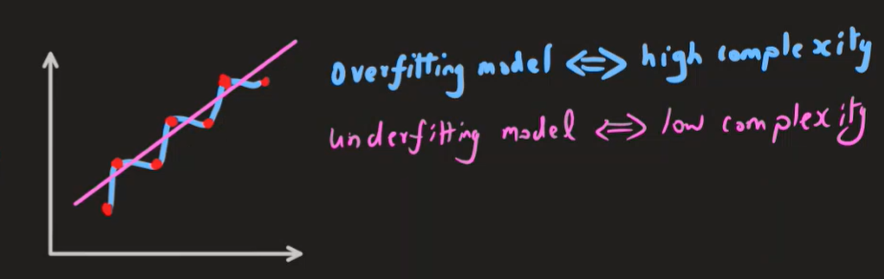



`Complexity here means the dimensionality of the data, typically meaning the features.`

**Overfitting:** The training accuracy is very high. The error that the model makes is 0. It is matching the input to the output for every data point. There is absolutely no training error but it has high complexity because the predicted value is not just the function of a single predictor but may be square, underroot and so on of the predictor value. The model is probably capturing the noise in the data.

**Underfitting:** The training accuracy is very low whcih can be the result of chosing incorrect set of variables to build the model. In this low complexity model the predictor variable is simply a linear function. There is only single predictor value but not square, underroot and so on.

*These are the two extremes, and we are attempting to strike the balance between these two. That is the name of the game in practicle ML ad data science.*

### **3. Computationally Inexpensive**

Computations of the oc-efficients are easily computed involving linear algerbra operations that are highly optimized and can be easily performed on computers.

### **4. Can be used as a reference for comparing other models**

When we are using the linear model as the reference, there is a whole lot we get to do where and when simulatneousl like train-test-split, cross-validation,model-scores, hyperparameters (which are quantities associated with models that we want to optimize), statitical tests (which is possible with linear models). We can extend all this to complex (non-linear) models.


In [1]:
install.packages(c('ggplo2', 'dplyr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplo2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Loading the house price dataset
# and dealing with "Missing values" with na.strings argument with vector of strings
hData = read.csv("/content/houseprices_cleaned.csv", header = TRUE, stringsAsFactors = FALSE,
na.strings = c("", "NA", "Not Available", "not available"))
str(hData)

'data.frame':	225 obs. of  8 variables:
 $ locality      : chr  "BTM Layout" "BTM Layout" "BTM Layout" "BTM Layout" ...
 $ area          : int  565 1837 1280 2220 1113 1332 1815 1400 3006 1600 ...
 $ rent          : int  20060 97434 54448 117000 34388 36394 112000 41266 129000 92849 ...
 $ price_per_sqft: int  6195 9254 7422 9234 5391 4767 10744 5143 7485 10125 ...
 $ facing        : chr  "North-West" "East" "East" "North" ...
 $ BHK           : int  1 3 2 3 2 2 3 2 4 3 ...
 $ bathrooms     : int  1 3 2 3 2 2 2 2 5 2 ...
 $ parking       : chr  "Bike" "Bike and Car" "Car" "Bike and Car" ...


Here, our response variable which we want to predict is `price_per_sqft`.

In [4]:
# converting 'locality', 'facing' and 'parking' columns to factors
cat_col = c('locality', 'facing', 'parking')
hData[cat_col] = lapply(hData[cat_col], as.factor)
str(hData)

'data.frame':	225 obs. of  8 variables:
 $ locality      : Factor w/ 9 levels "Attibele","BTM Layout",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ area          : int  565 1837 1280 2220 1113 1332 1815 1400 3006 1600 ...
 $ rent          : int  20060 97434 54448 117000 34388 36394 112000 41266 129000 92849 ...
 $ price_per_sqft: int  6195 9254 7422 9234 5391 4767 10744 5143 7485 10125 ...
 $ facing        : Factor w/ 7 levels "East","North",..: 4 1 1 2 1 7 3 6 1 5 ...
 $ BHK           : int  1 3 2 3 2 2 3 2 4 3 ...
 $ bathrooms     : int  1 3 2 3 2 2 2 2 5 2 ...
 $ parking       : Factor w/ 3 levels "Bike","Bike and Car",..: 1 2 3 2 2 2 3 2 2 2 ...


In [5]:
### Getting vector of Continuous column

#colnames(hData)
#setdiff(colnames(hData), cat_col) # set A - set B

continuous_col  = setdiff(colnames(hData), cat_col)
continuous_col

[1] "area"           "rent"           "price_per_sqft" "BHK"           
[5] "bathrooms"

### **Plotting the percentage of NAs in each column of the data frame**

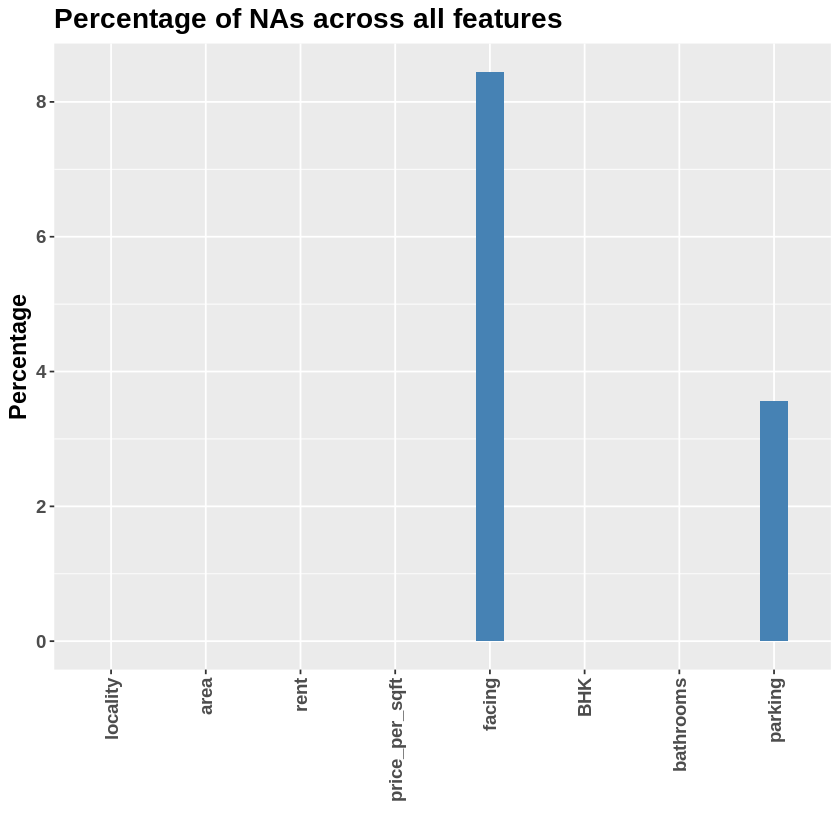

In [6]:
hData_NA = setNames(stack(sapply(hData,
function(x){(sum(is.na(x))/length(x))*100}))[2:1],
c('Feature','Value'))
p = ggplot(data = hData_NA, aes(x = Feature, y = Value)) +
  geom_bar(stat = 'identity', fill = 'steelblue', width = 0.3) +
  theme(text = element_text(size = 14, face = 'bold'),
  axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
  xlab('') + ylab('Percentage') +
  ggtitle('Percentage of NAs across all features')
p

Let's check the levels:

We can try replacing the missing value with most occuring level.

In [7]:
levels(hData$facing)

[1] "East"       "North"      "North-East" "North-West" "South"     
[6] "South-East" "West"

### **Adding NA as a factor level for categorical columns**

From business prespective, if we accept that the missing values will be part of our dataset. We can try *adding NA as a factor level for categorical columns* .

In this case, missing will be a new label for the categorical columns.


In [8]:
hData[cat_col] = lapply(hData[cat_col], addNA)
str(hData)

'data.frame':	225 obs. of  8 variables:
 $ locality      : Factor w/ 10 levels "Attibele","BTM Layout",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ area          : int  565 1837 1280 2220 1113 1332 1815 1400 3006 1600 ...
 $ rent          : int  20060 97434 54448 117000 34388 36394 112000 41266 129000 92849 ...
 $ price_per_sqft: int  6195 9254 7422 9234 5391 4767 10744 5143 7485 10125 ...
 $ facing        : Factor w/ 8 levels "East","North",..: 4 1 1 2 1 7 3 6 1 5 ...
 $ BHK           : int  1 3 2 3 2 2 3 2 4 3 ...
 $ bathrooms     : int  1 3 2 3 2 2 2 2 5 2 ...
 $ parking       : Factor w/ 4 levels "Bike","Bike and Car",..: 1 2 3 2 2 2 3 2 2 2 ...


Therefore, practicle way of addressing missing values is to accept the fact that unseen data that we get in the future can have missing information.

## **Exploratory Analysis**

### What does it mean when we say we are building a linear model?

We want to predict the price per square feet as a function of how much rent one pays.

**Popualtion model:**
`price_per_sqf = f(rent) + ε`

Here,

f = unknown function

ε = Observed (`Noise inherent in the sysytem`, `the predictors that are not included or taken into account`,  `non-linear effects not incuded`)

Here, population model represents the true relationship. The parameters for population model B0 and B1 (in this case) are fixed and unknown numbers whereas the estimates B0hat and B1hat (seen as apprximations of B0 and B1) are random variables as they are estimated from (random) datasets.

---------

**Linear Model:**
`price_per_sqf = B0 + B1(rent) + ε`

This is a linear model approximating the unknown function f() and  Beta 0 (B0) and Beta 1 (B1) are referred as population parameters. As such, this model is not going to be accurate as there will be presence of some error which is captured by Epsilon(ε). Error like non-linear effects which are not captured.

We have a small dataset which is a small represenattion of the original population dataset. We are going to find out the approximation for the Beta0 and Beta1 using our paticular dataset. This is the goal of linear regression.

The goal of the linear model building process is to identify or to calculate approximations for the population parameters B0 and B1 using a particular dataset from within the population.

Here, we push the non-linearilty into the error term and capture approximations for the population parameters B0 and B1.


We want to predict:
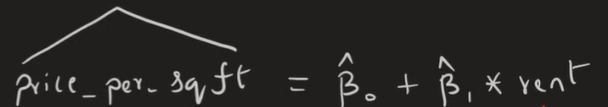

Here,

rent = predictor / input variable / covariate

price_per_sqft = response / output variable

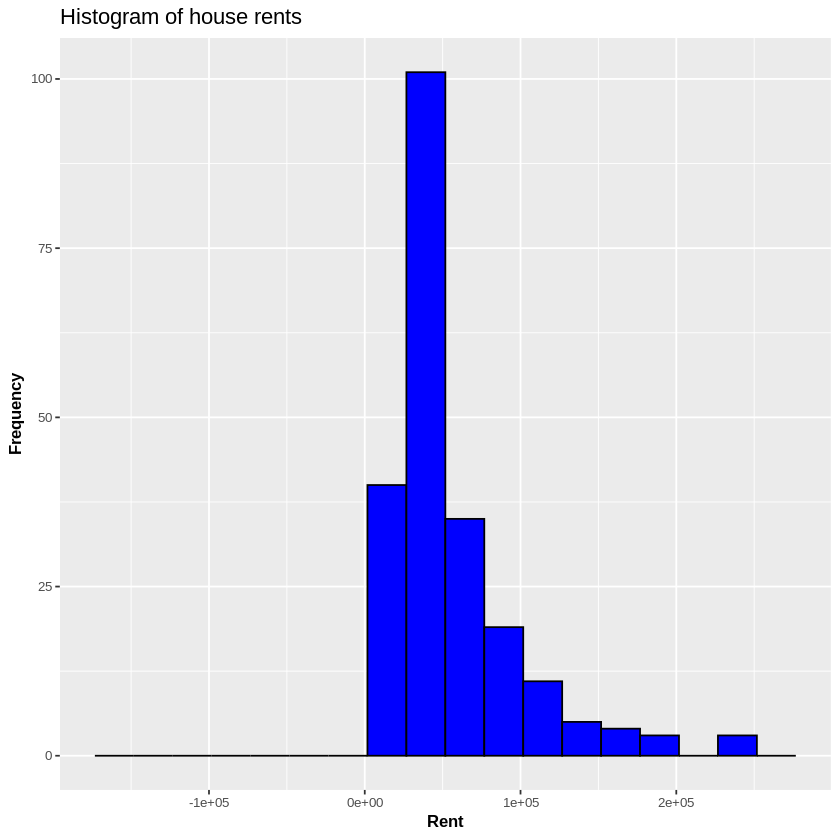

In [9]:
# Making a histogram of rent values
p = ggplot(data = hData) +
  geom_histogram(aes(x = rent, y = after_stat(count)),
breaks = seq(mean(hData$rent)-4*sd(hData$rent),
mean(hData$rent)+ 4*sd(hData$rent), by = 25000),
color = 'black', fill = 'blue') +
  labs(x = 'Rent', y = 'Frequency')  +
   theme(axis.text = element_text(size = 10),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 10, face = "bold"))  +
  ggtitle('Histogram of house rents')
p

As we can see its positively skewed mean is pulled towards the direction of the skew making it higher than the median price.

In [10]:
mean(hData$rent)

[1] 61651.95

In [11]:
median(hData$rent)

[1] 42985

Here, we can see that the mean is sensitive to outliers while the median is not.

In [12]:
# fraction of houses have a rent that are less than or equal to the median rent
mean(hData$rent <= median(hData$rent))

[1] 0.5333333

In [13]:
mean(hData$rent > median(hData$rent))

[1] 0.4666667

### Visualizing the relationship between rent and price using scatterplot

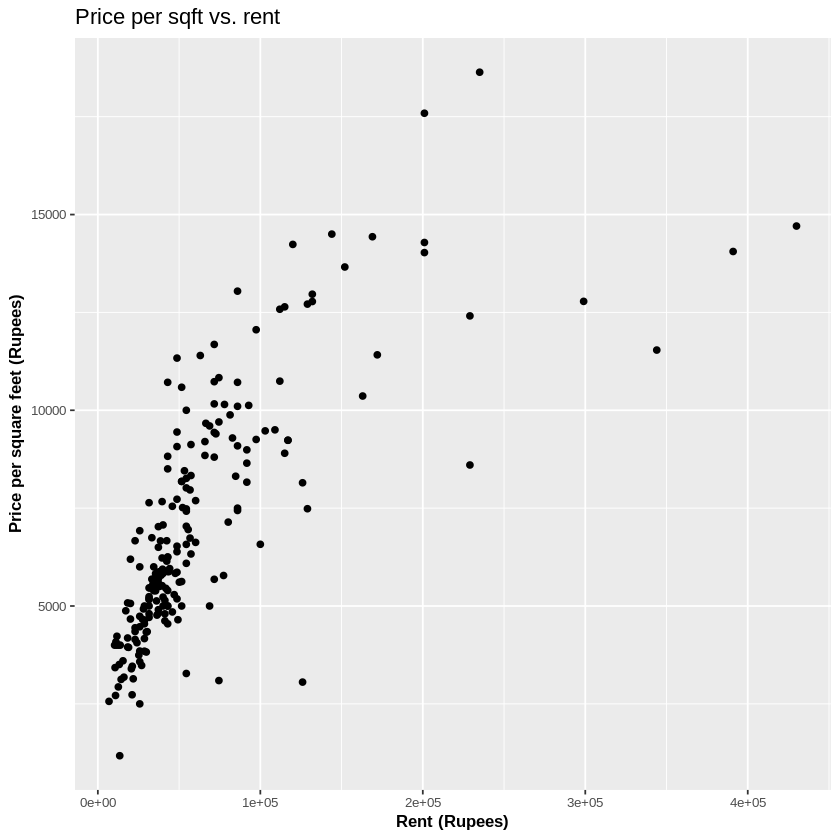

In [14]:
# Making a scatter plot between price per square feet and rent
p = ggplot(data = hData) +
  geom_point(aes(x = rent , y = price_per_sqft)) +
  labs(x = 'Rent (Rupees)', y = 'Price per square feet (Rupees)') +
   theme(axis.text = element_text(size = 10),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 10, face = "bold"))  +
  ggtitle('Price per sqft vs. rent')
p

### **Can we draw a line that fits through the data that sort of approximates the relationship between price_per_sqft vs rent?**

It looks like there is some relationship that we can capture.

----

In genereal when we make scatterplot is the scales along the horizontol and vertical axis. Theerfore, the ideal way to plot a scatter plot is to standardize the variables and plot.

However, in the linear regression, we typically onot want to standarize because of the interpretable factor. In this case, we want our predictor be rent in rupees so we can interpret what the price_per_sqft is also in rupees.

# **Simple Linear Regression Model**

In [15]:
# Build a linear model to predict price per square feet as a function of rent.
# How accurate is the model?
model1 = lm(data = hData, price_per_sqft ~ rent)
summary(model1)


Call:
lm(formula = price_per_sqft ~ rent, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-6415.5 -1116.9  -340.6  1193.6  5270.1 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.591e+03  1.960e+02   23.42   <2e-16 ***
rent        3.844e-02  2.305e-03   16.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2026 on 223 degrees of freedom
Multiple R-squared:  0.5551,	Adjusted R-squared:  0.5531 
F-statistic: 278.2 on 1 and 223 DF,  p-value: < 2.2e-16


Here, we can see that:

Estimate for `B0hat`: 4.591e+03

Estimate for `B1hat`: 3.844e-02

-----

Our linear model:

`price_per_sqft = B0hat + B1hat(rent)`

`price_per_sqft = 4.591e+03 + 3.844e-02 (rent)`

------

**As we have biult a SLRM, we have two questions to answer:**
## **1.   How is the linear model built? ( How are the coefficients calculated?)**

Let's look at few models:

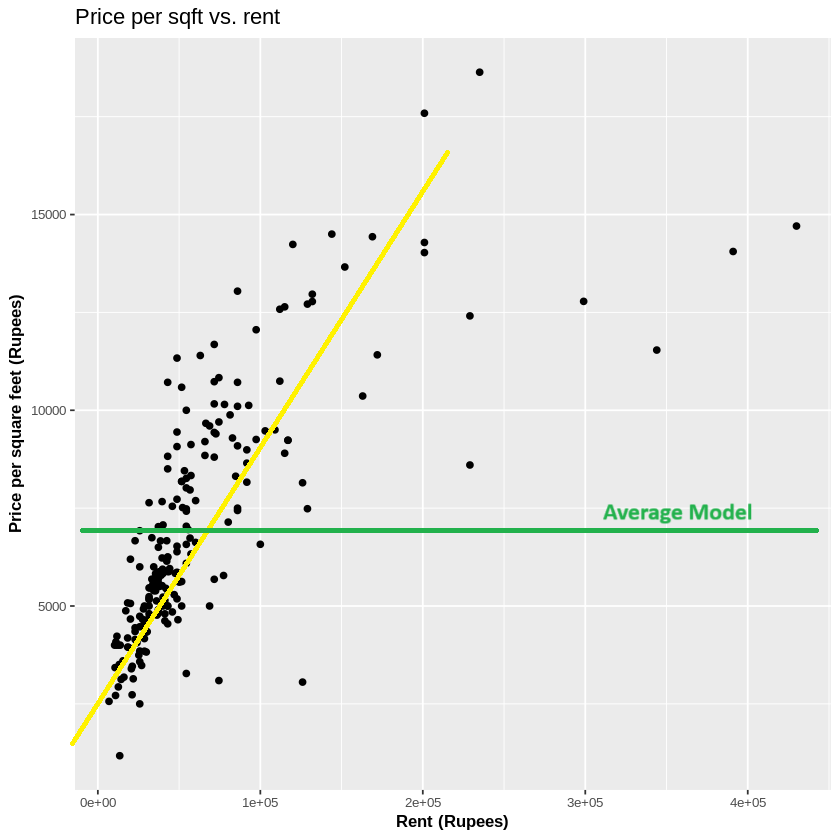

- *A very simple linear model / Average model (as predictors)*

The average simply says that the predicted house price is equal to the mean of the house price which is not very helpful. (This is just for understanding purpose, we are not going to use this model.)

- *Simple linear regression model (SLRM)*

```
price_per_sqft = B0hat + B1hat(rent)

Residual for the (i)th house = True price_per_sqft - predicted price_per_sqft

r(i) = y(i) - yhat(i)

r(i) = y(i) - [B0hat + B1hat(x(i))]
```
In the above expression, `y(i)` which is the true price_pre_sqft for the `(i)th` house and `x(i)1` which is the rent for the `(i)th` house are known values. The unkown quantities are B0hat and B1hat.

We have a measure of loss for the `(i)th` sample. Meaning, how unhappy we are with the `(i)th` sample as for our parameters `B0hat` and `B1hat` are concerned.

### Residual:
The **residual** tells us how unhappy we are with the `(i)th` sample. It is the deviation between the true house price and the predicted house price.

After this, we will accumulate the loss for all the samples. So, we simply sum up the residuals of all the samples.


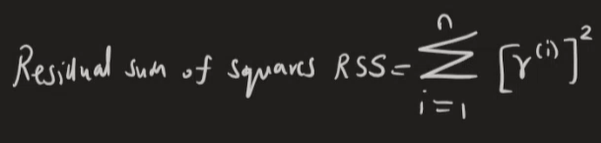

Residual Sum of Squares is a measure of loss for all the n samples.

*The goal of linear regression is to find the B0hat and B1hat (model parameters) such that the overall loss which is the residual sum of squares (RSS) is minimized.*

**Therefore, the `lm()` appropriately identifies the B0hat and B1hat such that RSS is minimized.**

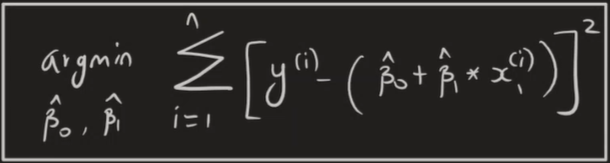



The `lm()` function in R performs this minimization to identify B0hat and B1hat.

## **2.   How accurate is the model?**

The `Adjusted R-Squared` is a metric that tells us how well our model is doing.

Above we have "`Adjusted R-squared:  0.5531`"

It is the proportion of the variance in the response variable that is explained by the linear model.

Here, there is a variance for price_per_sqft as we can see the price are scattered  around the average price in our scatterplot.

So, what proportion of this variance is explained by the linear model is answered by the Adjusted R-Squared i.e., only 55% of the variance associated with the response variable.

--------

**Can we do better? Can we transform input feature that out model performance improves?**

Let's create a new column called "`logrent`" where we will calculate the logarith of the rent.

In [16]:
hData['logrent'] = log(hData$rent)

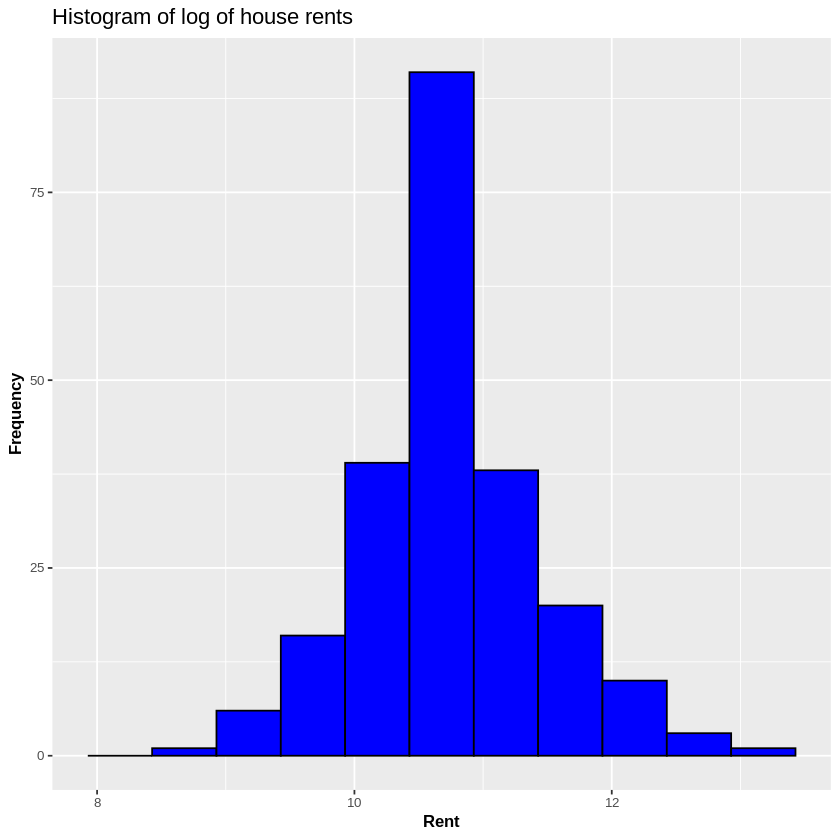

In [17]:
# Making a histogram of log-transformed rent values
p = ggplot(data = hData) +
  geom_histogram(aes(x = logrent, y = after_stat(count)),
breaks = seq(mean(hData$logrent)-4*sd(hData$logrent),
mean(hData$logrent)+4*sd(hData$logrent), by = 0.5), # spacing is just .5 insted of 25000
color = 'black', fill = 'blue') +
  labs(x = 'Rent', y = 'Frequency')  +
   theme(axis.text = element_text(size = 10),
   axis.text.x = element_text(size = 8),
   axis.text.y = element_text(size = 8),
   axis.title = element_text(size = 10, face = "bold"))  +
  ggtitle('Histogram of log of house rents')
p

When we performed log-tranformation of a +vely skewed histogram we can see we got the normally distributed histogram.

In [19]:
# Build a linear model to predict price per square feet as a function of logrent.
# How accurate is the model?
model2 = lm(data = hData, price_per_sqft ~ logrent)
summary(model2)


Call:
lm(formula = price_per_sqft ~ logrent, data = hData)

Residuals:
    Min      1Q  Median      3Q     Max 
-7406.1  -966.0  -325.3   968.0  5970.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -31058.9     1752.8  -17.72   <2e-16 ***
logrent       3535.5      162.6   21.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1720 on 223 degrees of freedom
Multiple R-squared:  0.6794,	Adjusted R-squared:  0.6779 
F-statistic: 472.5 on 1 and 223 DF,  p-value: < 2.2e-16


Here, we can see that transforming the variable using the logarithmic transformation dramatically improve the accuracy of the model (from 55% to 67.7%).

We are able to explain 68% of the variance in the house price suing a very simple transformation.